In [1]:
#-*- coding:utf-8 -*-
import os
import numpy as np
import numpy.random as rd
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt

os.chdir("..")
home_dir = os.getcwd()
os.chdir("src")
from crp import CRP
from dpm import DPM
os.chdir(home_dir)

In [2]:
seed = 0
n = [10, 10, 10, 10, 10] #各データ数
K = 5 #潜在変数の数
D = 2 #次元

#mu:D次元
mu_true = np.array(
    [[0.5, 0.5],
     [2.5, 0.5],
     [0.5, 2.5],
     [1.8, 1.8],
     [2.5, 2.5]])

#sigma: D×D次元
sigma_true = np.array(
    [[[0.03, 0], [0, 0.03]],
     [[0.05, 0], [0, 0.05]],
     [[0.05, 0], [0, 0.03]],
     [[0.01, 0], [0, 0.01]],
     [[0.04, 0], [0, 0.04]]
    ])

rd.seed(seed)
org_data = None
for i in range(K):
    #k_0 に属するデータを生成
    if org_data is None:
        org_data = np.c_[st.multivariate_normal.rvs(mean=mu_true[i], cov=sigma_true[i], size=n[i]), np.ones(n[i])*i]
        
    #k_1, k_2に属するデータを生成し、結合する
    else:
        tmp_data = np.c_[st.multivariate_normal.rvs(mean=mu_true[i], cov=sigma_true[i], size=n[i]), np.ones(n[i])*i]
        org_data = np.r_[org_data, tmp_data]



In [3]:
x = org_data[:,:2].copy()

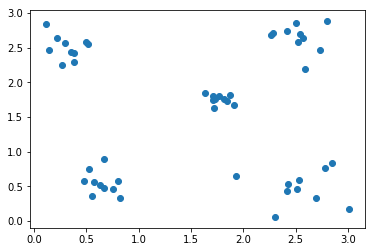

In [4]:
plt.figure()
plt.scatter(x[:,0], x[:,1])
plt.show()

In [5]:
#ハイパーパラメータ
alpha = 1.0
mu0 = np.mean(x, axis=0)#全パターンの平均ベクトル
beta = 0.1
nu = 15
S = np.array([[1, 0],
              [0, 1]])

In [6]:
dpm = DPM(x, alpha, mu0, beta, nu, S)

In [7]:
dpm.train(min_step=1000, stop_count=100, verbose=1)

step: 1
step: 2
step: 3
step: 4
step: 5
step: 6
step: 7
step: 8
step: 9
step: 10
step: 11
step: 12
step: 13
step: 14
step: 15
step: 16
step: 17
step: 18
step: 19
step: 20
step: 21
step: 22
step: 23
step: 24
step: 25
step: 26
step: 27
step: 28
step: 29
step: 30
step: 31
step: 32
step: 33
step: 34
step: 35
step: 36
step: 37
step: 38
step: 39
step: 40
step: 41
step: 42
step: 43
step: 44
step: 45
step: 46
step: 47
step: 48
step: 49
step: 50
step: 51
step: 52
step: 53
step: 54
step: 55
step: 56
step: 57
step: 58
step: 59
step: 60
step: 61
step: 62
step: 63
step: 64
step: 65
step: 66
step: 67
step: 68
step: 69
step: 70
step: 71
step: 72
step: 73
step: 74
step: 75
step: 76
step: 77
step: 78
step: 79
step: 80
step: 81
step: 82
step: 83
step: 84
step: 85
step: 86
step: 87
step: 88
step: 89
step: 90
step: 91
step: 92
step: 93
step: 94
step: 95
step: 96
step: 97
step: 98
step: 99
step: 100
step: 101
step: 102
step: 103
step: 104
step: 105
step: 106
step: 107
step: 108
step: 109
step: 110
step: 11

step: 846
step: 847
step: 848
step: 849
step: 850
step: 851
step: 852
step: 853
step: 854
step: 855
step: 856
step: 857
step: 858
step: 859
step: 860
step: 861
step: 862
step: 863
step: 864
step: 865
step: 866
step: 867
step: 868
step: 869
step: 870
step: 871
step: 872
step: 873
step: 874
step: 875
step: 876
step: 877
step: 878
step: 879
step: 880
step: 881
step: 882
step: 883
step: 884
step: 885
step: 886
step: 887
step: 888
step: 889
step: 890
step: 891
step: 892
step: 893
step: 894
step: 895
step: 896
step: 897
step: 898
step: 899
step: 900
step: 901
step: 902
step: 903
step: 904
step: 905
step: 906
step: 907
step: 908
step: 909
step: 910
step: 911
step: 912
step: 913
step: 914
step: 915
step: 916
step: 917
step: 918
step: 919
step: 920
step: 921
step: 922
step: 923
step: 924
step: 925
step: 926
step: 927
step: 928
step: 929
step: 930
step: 931
step: 932
step: 933
step: 934
step: 935
step: 936
step: 937
step: 938
step: 939
step: 940
step: 941
step: 942
step: 943
step: 944
step: 945


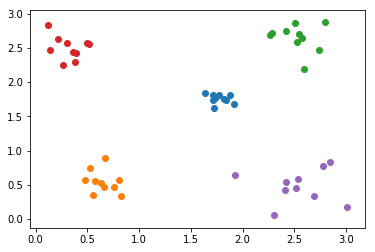

In [8]:
# plot generated data        
plt.figure()

xs = np.c_[dpm.x, dpm.s_hat]

for i in range(dpm.c+1):
    plt.scatter(xs[xs[:,2]==i][:,0], xs[xs[:,2]==i][:,1])
plt.show()

In [9]:
seed = 0
n = [200, 150, 150] #各データ数
K = 3 #潜在変数の数
D = 2 #次元

#mu:D次元
mu_true = np.array(
    [[0.2, 0.5],
     [1.2, 0.5],
     [2.0, 0.5]])

#sigma: D×D次元
sigma_true = np.array(
    [[[0.1,  0.085], [0.085, 0.1]],
     [[0.1, -0.085], [-0.085, 0.1]],
     [[0.1,  0.085], [0.085, 0.1]]
    ])

rd.seed(seed)
org_data = None
for i in range(K):
    #k_0 に属するデータを生成
    if org_data is None:
        org_data = np.c_[st.multivariate_normal.rvs(mean=mu_true[i], cov=sigma_true[i], size=n[i]), np.ones(n[i])*i]
        
    #k_1, k_2に属するデータを生成し、結合する
    else:
        tmp_data = np.c_[st.multivariate_normal.rvs(mean=mu_true[i], cov=sigma_true[i], size=n[i]), np.ones(n[i])*i]
        org_data = np.r_[org_data, tmp_data]

#print(org_data)

In [10]:
x = org_data[:,:2].copy()

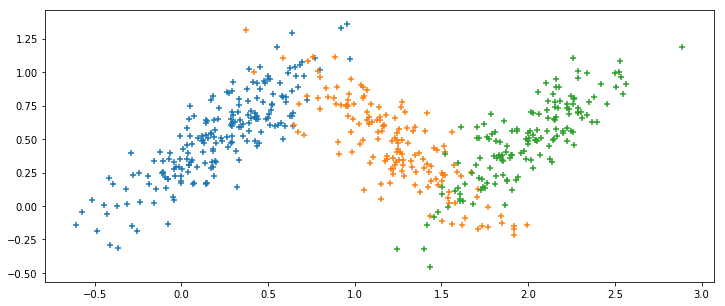

In [11]:
# plot original data        
plt.figure(figsize=(12, 5))
for i in range(K):
    plt.scatter(org_data[org_data[:,2]==i][:,0], org_data[org_data[:,2]==i][:,1], marker="+")
plt.show()

In [12]:
#ハイパーパラメータ
alpha = 1.0
mu0 = np.mean(x, axis=0)#全パターンの平均ベクトル
beta = 1 / 3
nu = 15
S = np.array([[0.1, 0],
              [0, 0.1]])

In [13]:
dpm2 = DPM(x, alpha, mu0, beta, nu, S)

In [14]:
dpm2.train(min_step=10000, stop_count=100, verbose=1)

step: 1
step: 2
step: 3
step: 4
step: 5
step: 6
step: 7
step: 8
step: 9
step: 10
step: 11
step: 12
step: 13
step: 14
step: 15
step: 16
step: 17
step: 18
step: 19
step: 20
step: 21
step: 22
step: 23
step: 24
step: 25
step: 26
step: 27
step: 28
step: 29
step: 30
step: 31
step: 32
step: 33
step: 34
step: 35
step: 36
step: 37
step: 38
step: 39
step: 40
step: 41
step: 42
step: 43
step: 44
step: 45
step: 46
step: 47
step: 48
step: 49
step: 50
step: 51
step: 52
step: 53
step: 54
step: 55
step: 56
step: 57
step: 58
step: 59
step: 60
step: 61
step: 62
step: 63
step: 64
step: 65
step: 66
step: 67
step: 68
step: 69
step: 70
step: 71
step: 72
step: 73
step: 74
step: 75
step: 76
step: 77
step: 78
step: 79
step: 80
step: 81
step: 82
step: 83
step: 84
step: 85
step: 86
step: 87
step: 88
step: 89
step: 90
step: 91
step: 92
step: 93
step: 94
step: 95
step: 96
step: 97
step: 98
step: 99
step: 100
step: 101
step: 102
step: 103
step: 104
step: 105
step: 106
step: 107
step: 108
step: 109
step: 110
step: 11

step: 835
step: 836
step: 837
step: 838
step: 839
step: 840
step: 841
step: 842
step: 843
step: 844
step: 845
step: 846
step: 847
step: 848
step: 849
step: 850
step: 851
step: 852
step: 853
step: 854
step: 855
step: 856
step: 857
step: 858
step: 859
step: 860
step: 861
step: 862
step: 863
step: 864
step: 865
step: 866
step: 867
step: 868
step: 869
step: 870
step: 871
step: 872
step: 873
step: 874
step: 875
step: 876
step: 877
step: 878
step: 879
step: 880
step: 881
step: 882
step: 883
step: 884
step: 885
step: 886
step: 887
step: 888
step: 889
step: 890
step: 891
step: 892
step: 893
step: 894
step: 895
step: 896
step: 897
step: 898
step: 899
step: 900
step: 901
step: 902
step: 903
step: 904
step: 905
step: 906
step: 907
step: 908
step: 909
step: 910
step: 911
step: 912
step: 913
step: 914
step: 915
step: 916
step: 917
step: 918
step: 919
step: 920
step: 921
step: 922
step: 923
step: 924
step: 925
step: 926
step: 927
step: 928
step: 929
step: 930
step: 931
step: 932
step: 933
step: 934


step: 1597
step: 1598
step: 1599
step: 1600
step: 1601
step: 1602
step: 1603
step: 1604
step: 1605
step: 1606
step: 1607
step: 1608
step: 1609
step: 1610
step: 1611
step: 1612
step: 1613
step: 1614
step: 1615
step: 1616
step: 1617
step: 1618
step: 1619
step: 1620
step: 1621
step: 1622
step: 1623
step: 1624
step: 1625
step: 1626
step: 1627
step: 1628
step: 1629
step: 1630
step: 1631
step: 1632
step: 1633
step: 1634
step: 1635
step: 1636
step: 1637
step: 1638
step: 1639
step: 1640
step: 1641
step: 1642
step: 1643
step: 1644
step: 1645
step: 1646
step: 1647
step: 1648
step: 1649
step: 1650
step: 1651
step: 1652
step: 1653
step: 1654
step: 1655
step: 1656
step: 1657
step: 1658
step: 1659
step: 1660
step: 1661
step: 1662
step: 1663
step: 1664
step: 1665
step: 1666
step: 1667
step: 1668
step: 1669
step: 1670
step: 1671
step: 1672
step: 1673
step: 1674
step: 1675
step: 1676
step: 1677
step: 1678
step: 1679
step: 1680
step: 1681
step: 1682
step: 1683
step: 1684
step: 1685
step: 1686
step: 1687

step: 2344
step: 2345
step: 2346
step: 2347
step: 2348
step: 2349
step: 2350
step: 2351
step: 2352
step: 2353
step: 2354
step: 2355
step: 2356
step: 2357
step: 2358
step: 2359
step: 2360
step: 2361
step: 2362
step: 2363
step: 2364
step: 2365
step: 2366
step: 2367
step: 2368
step: 2369
step: 2370
step: 2371
step: 2372
step: 2373
step: 2374
step: 2375
step: 2376
step: 2377
step: 2378
step: 2379
step: 2380
step: 2381
step: 2382
step: 2383
step: 2384
step: 2385
step: 2386
step: 2387
step: 2388
step: 2389
step: 2390
step: 2391
step: 2392
step: 2393
step: 2394
step: 2395
step: 2396
step: 2397
step: 2398
step: 2399
step: 2400
step: 2401
step: 2402
step: 2403
step: 2404
step: 2405
step: 2406
step: 2407
step: 2408
step: 2409
step: 2410
step: 2411
step: 2412
step: 2413
step: 2414
step: 2415
step: 2416
step: 2417
step: 2418
step: 2419
step: 2420
step: 2421
step: 2422
step: 2423
step: 2424
step: 2425
step: 2426
step: 2427
step: 2428
step: 2429
step: 2430
step: 2431
step: 2432
step: 2433
step: 2434

step: 3090
step: 3091
step: 3092
step: 3093
step: 3094
step: 3095
step: 3096
step: 3097
step: 3098
step: 3099
step: 3100
step: 3101
step: 3102
step: 3103
step: 3104
step: 3105
step: 3106
step: 3107
step: 3108
step: 3109
step: 3110
step: 3111
step: 3112
step: 3113
step: 3114
step: 3115
step: 3116
step: 3117
step: 3118
step: 3119
step: 3120
step: 3121
step: 3122
step: 3123
step: 3124
step: 3125
step: 3126
step: 3127
step: 3128
step: 3129
step: 3130
step: 3131
step: 3132
step: 3133
step: 3134
step: 3135
step: 3136
step: 3137
step: 3138
step: 3139
step: 3140
step: 3141
step: 3142
step: 3143
step: 3144
step: 3145
step: 3146
step: 3147
step: 3148
step: 3149
step: 3150
step: 3151
step: 3152
step: 3153
step: 3154
step: 3155
step: 3156
step: 3157
step: 3158
step: 3159
step: 3160
step: 3161
step: 3162
step: 3163
step: 3164
step: 3165
step: 3166
step: 3167
step: 3168
step: 3169
step: 3170
step: 3171
step: 3172
step: 3173
step: 3174
step: 3175
step: 3176
step: 3177
step: 3178
step: 3179
step: 3180

step: 3835
step: 3836
step: 3837
step: 3838
step: 3839
step: 3840
step: 3841
step: 3842
step: 3843
step: 3844
step: 3845
step: 3846
step: 3847
step: 3848
step: 3849
step: 3850
step: 3851
step: 3852
step: 3853
step: 3854
step: 3855
step: 3856
step: 3857
step: 3858
step: 3859
step: 3860
step: 3861
step: 3862
step: 3863
step: 3864
step: 3865
step: 3866
step: 3867
step: 3868
step: 3869
step: 3870
step: 3871
step: 3872
step: 3873
step: 3874
step: 3875
step: 3876
step: 3877
step: 3878
step: 3879
step: 3880
step: 3881
step: 3882
step: 3883
step: 3884
step: 3885
step: 3886
step: 3887
step: 3888
step: 3889
step: 3890
step: 3891
step: 3892
step: 3893
step: 3894
step: 3895
step: 3896
step: 3897
step: 3898
step: 3899
step: 3900
step: 3901
step: 3902
step: 3903
step: 3904
step: 3905
step: 3906
step: 3907
step: 3908
step: 3909
step: 3910
step: 3911
step: 3912
step: 3913
step: 3914
step: 3915
step: 3916
step: 3917
step: 3918
step: 3919
step: 3920
step: 3921
step: 3922
step: 3923
step: 3924
step: 3925

step: 4581
step: 4582
step: 4583
step: 4584
step: 4585
step: 4586
step: 4587
step: 4588
step: 4589
step: 4590
step: 4591
step: 4592
step: 4593
step: 4594
step: 4595
step: 4596
step: 4597
step: 4598
step: 4599
step: 4600
step: 4601
step: 4602
step: 4603
step: 4604
step: 4605
step: 4606
step: 4607
step: 4608
step: 4609
step: 4610
step: 4611
step: 4612
step: 4613
step: 4614
step: 4615
step: 4616
step: 4617
step: 4618
step: 4619
step: 4620
step: 4621
step: 4622
step: 4623
step: 4624
step: 4625
step: 4626
step: 4627
step: 4628
step: 4629
step: 4630
step: 4631
step: 4632
step: 4633
step: 4634
step: 4635
step: 4636
step: 4637
step: 4638
step: 4639
step: 4640
step: 4641
step: 4642
step: 4643
step: 4644
step: 4645
step: 4646
step: 4647
step: 4648
step: 4649
step: 4650
step: 4651
step: 4652
step: 4653
step: 4654
step: 4655
step: 4656
step: 4657
step: 4658
step: 4659
step: 4660
step: 4661
step: 4662
step: 4663
step: 4664
step: 4665
step: 4666
step: 4667
step: 4668
step: 4669
step: 4670
step: 4671

step: 5327
step: 5328
step: 5329
step: 5330
step: 5331
step: 5332
step: 5333
step: 5334
step: 5335
step: 5336
step: 5337
step: 5338
step: 5339
step: 5340
step: 5341
step: 5342
step: 5343
step: 5344
step: 5345
step: 5346
step: 5347
step: 5348
step: 5349
step: 5350
step: 5351
step: 5352
step: 5353
step: 5354
step: 5355
step: 5356
step: 5357
step: 5358
step: 5359
step: 5360
step: 5361
step: 5362
step: 5363
step: 5364
step: 5365
step: 5366
step: 5367
step: 5368
step: 5369
step: 5370
step: 5371
step: 5372
step: 5373
step: 5374
step: 5375
step: 5376
step: 5377
step: 5378
step: 5379
step: 5380
step: 5381
step: 5382
step: 5383
step: 5384
step: 5385
step: 5386
step: 5387
step: 5388
step: 5389
step: 5390
step: 5391
step: 5392
step: 5393
step: 5394
step: 5395
step: 5396
step: 5397
step: 5398
step: 5399
step: 5400
step: 5401
step: 5402
step: 5403
step: 5404
step: 5405
step: 5406
step: 5407
step: 5408
step: 5409
step: 5410
step: 5411
step: 5412
step: 5413
step: 5414
step: 5415
step: 5416
step: 5417

step: 6073
step: 6074
step: 6075
step: 6076
step: 6077
step: 6078
step: 6079
step: 6080
step: 6081
step: 6082
step: 6083
step: 6084
step: 6085
step: 6086
step: 6087
step: 6088
step: 6089
step: 6090
step: 6091
step: 6092
step: 6093
step: 6094
step: 6095
step: 6096
step: 6097
step: 6098
step: 6099
step: 6100
step: 6101
step: 6102
step: 6103
step: 6104
step: 6105
step: 6106
step: 6107
step: 6108
step: 6109
step: 6110
step: 6111
step: 6112
step: 6113
step: 6114
step: 6115
step: 6116
step: 6117
step: 6118
step: 6119
step: 6120
step: 6121
step: 6122
step: 6123
step: 6124
step: 6125
step: 6126
step: 6127
step: 6128
step: 6129
step: 6130
step: 6131
step: 6132
step: 6133
step: 6134
step: 6135
step: 6136
step: 6137
step: 6138
step: 6139
step: 6140
step: 6141
step: 6142
step: 6143
step: 6144
step: 6145
step: 6146
step: 6147
step: 6148
step: 6149
step: 6150
step: 6151
step: 6152
step: 6153
step: 6154
step: 6155
step: 6156
step: 6157
step: 6158
step: 6159
step: 6160
step: 6161
step: 6162
step: 6163

step: 6819
step: 6820
step: 6821
step: 6822
step: 6823
step: 6824
step: 6825
step: 6826
step: 6827
step: 6828
step: 6829
step: 6830
step: 6831
step: 6832
step: 6833
step: 6834
step: 6835
step: 6836
step: 6837
step: 6838
step: 6839
step: 6840
step: 6841
step: 6842
step: 6843
step: 6844
step: 6845
step: 6846
step: 6847
step: 6848
step: 6849
step: 6850
step: 6851
step: 6852
step: 6853
step: 6854
step: 6855
step: 6856
step: 6857
step: 6858
step: 6859
step: 6860
step: 6861
step: 6862
step: 6863
step: 6864
step: 6865
step: 6866
step: 6867
step: 6868
step: 6869
step: 6870
step: 6871
step: 6872
step: 6873
step: 6874
step: 6875
step: 6876
step: 6877
step: 6878
step: 6879
step: 6880
step: 6881
step: 6882
step: 6883
step: 6884
step: 6885
step: 6886
step: 6887
step: 6888
step: 6889
step: 6890
step: 6891
step: 6892
step: 6893
step: 6894
step: 6895
step: 6896
step: 6897
step: 6898
step: 6899
step: 6900
step: 6901
step: 6902
step: 6903
step: 6904
step: 6905
step: 6906
step: 6907
step: 6908
step: 6909

step: 7566
step: 7567
step: 7568
step: 7569
step: 7570
step: 7571
step: 7572
step: 7573
step: 7574
step: 7575
step: 7576
step: 7577
step: 7578
step: 7579
step: 7580
step: 7581
step: 7582
step: 7583
step: 7584
step: 7585
step: 7586
step: 7587
step: 7588
step: 7589
step: 7590
step: 7591
step: 7592
step: 7593
step: 7594
step: 7595
step: 7596
step: 7597
step: 7598
step: 7599
step: 7600
step: 7601
step: 7602
step: 7603
step: 7604
step: 7605
step: 7606
step: 7607
step: 7608
step: 7609
step: 7610
step: 7611
step: 7612
step: 7613
step: 7614
step: 7615
step: 7616
step: 7617
step: 7618
step: 7619
step: 7620
step: 7621
step: 7622
step: 7623
step: 7624
step: 7625
step: 7626
step: 7627
step: 7628
step: 7629
step: 7630
step: 7631
step: 7632
step: 7633
step: 7634
step: 7635
step: 7636
step: 7637
step: 7638
step: 7639
step: 7640
step: 7641
step: 7642
step: 7643
step: 7644
step: 7645
step: 7646
step: 7647
step: 7648
step: 7649
step: 7650
step: 7651
step: 7652
step: 7653
step: 7654
step: 7655
step: 7656

step: 8314
step: 8315
step: 8316
step: 8317
step: 8318
step: 8319
step: 8320
step: 8321
step: 8322
step: 8323
step: 8324
step: 8325
step: 8326
step: 8327
step: 8328
step: 8329
step: 8330
step: 8331
step: 8332
step: 8333
step: 8334
step: 8335
step: 8336
step: 8337
step: 8338
step: 8339
step: 8340
step: 8341
step: 8342
step: 8343
step: 8344
step: 8345
step: 8346
step: 8347
step: 8348
step: 8349
step: 8350
step: 8351
step: 8352
step: 8353
step: 8354
step: 8355
step: 8356
step: 8357
step: 8358
step: 8359
step: 8360
step: 8361
step: 8362
step: 8363
step: 8364
step: 8365
step: 8366
step: 8367
step: 8368
step: 8369
step: 8370
step: 8371
step: 8372
step: 8373
step: 8374
step: 8375
step: 8376
step: 8377
step: 8378
step: 8379
step: 8380
step: 8381
step: 8382
step: 8383
step: 8384
step: 8385
step: 8386
step: 8387
step: 8388
step: 8389
step: 8390
step: 8391
step: 8392
step: 8393
step: 8394
step: 8395
step: 8396
step: 8397
step: 8398
step: 8399
step: 8400
step: 8401
step: 8402
step: 8403
step: 8404

step: 9060
step: 9061
step: 9062
step: 9063
step: 9064
step: 9065
step: 9066
step: 9067
step: 9068
step: 9069
step: 9070
step: 9071
step: 9072
step: 9073
step: 9074
step: 9075
step: 9076
step: 9077
step: 9078
step: 9079
step: 9080
step: 9081
step: 9082
step: 9083
step: 9084
step: 9085
step: 9086
step: 9087
step: 9088
step: 9089
step: 9090
step: 9091
step: 9092
step: 9093
step: 9094
step: 9095
step: 9096
step: 9097
step: 9098
step: 9099
step: 9100
step: 9101
step: 9102
step: 9103
step: 9104
step: 9105
step: 9106
step: 9107
step: 9108
step: 9109
step: 9110
step: 9111
step: 9112
step: 9113
step: 9114
step: 9115
step: 9116
step: 9117
step: 9118
step: 9119
step: 9120
step: 9121
step: 9122
step: 9123
step: 9124
step: 9125
step: 9126
step: 9127
step: 9128
step: 9129
step: 9130
step: 9131
step: 9132
step: 9133
step: 9134
step: 9135
step: 9136
step: 9137
step: 9138
step: 9139
step: 9140
step: 9141
step: 9142
step: 9143
step: 9144
step: 9145
step: 9146
step: 9147
step: 9148
step: 9149
step: 9150

step: 9805
step: 9806
step: 9807
step: 9808
step: 9809
step: 9810
step: 9811
step: 9812
step: 9813
step: 9814
step: 9815
step: 9816
step: 9817
step: 9818
step: 9819
step: 9820
step: 9821
step: 9822
step: 9823
step: 9824
step: 9825
step: 9826
step: 9827
step: 9828
step: 9829
step: 9830
step: 9831
step: 9832
step: 9833
step: 9834
step: 9835
step: 9836
step: 9837
step: 9838
step: 9839
step: 9840
step: 9841
step: 9842
step: 9843
step: 9844
step: 9845
step: 9846
step: 9847
step: 9848
step: 9849
step: 9850
step: 9851
step: 9852
step: 9853
step: 9854
step: 9855
step: 9856
step: 9857
step: 9858
step: 9859
step: 9860
step: 9861
step: 9862
step: 9863
step: 9864
step: 9865
step: 9866
step: 9867
step: 9868
step: 9869
step: 9870
step: 9871
step: 9872
step: 9873
step: 9874
step: 9875
step: 9876
step: 9877
step: 9878
step: 9879
step: 9880
step: 9881
step: 9882
step: 9883
step: 9884
step: 9885
step: 9886
step: 9887
step: 9888
step: 9889
step: 9890
step: 9891
step: 9892
step: 9893
step: 9894
step: 9895

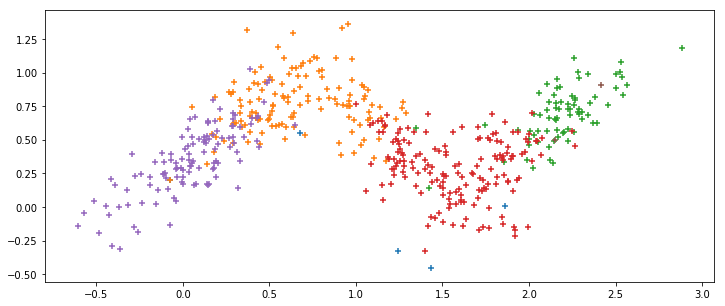

In [15]:
# plot generated data        
plt.figure(figsize=(12, 5))

xs = np.c_[dpm2.x, dpm2.s_hat]

for i in range(dpm2.c_hat+1):
    plt.scatter(xs[xs[:,2]==i][:,0], xs[xs[:,2]==i][:,1], marker="+")
plt.show()

In [16]:
dpm2.n_hat

{0: 5, 1: 136, 2: 74, 3: 166, 4: 117, 5: 2}

### パラメータを変更
α: クラスタを分割しやすくするパラメータ. 大きいほど, クラスタが分割されやすくなる.<br>
μ0: クラスタの平均に影響を与えるパラメータ. βの値が小さいとほとんど影響しない.<br>
ν,S: ν,Sが大きいほど, クラスタが分割されやすくなる.<br>

In [17]:
#νを小さくして、分割をされにくくする(νSが小さくなると分割されにくくなる)
alpha = 1.0
mu0 = np.mean(x, axis=0)#全パターンの平均ベクトル
beta = 1 / 3
nu = 5
S = np.array([[0.1, 0],
              [0, 0.1]])

In [18]:
dpm3 = DPM(x, alpha, mu0, beta, nu, S)
dpm3.train(min_step=10000, stop_count=100, verbose=1)

step: 1
step: 2
step: 3
step: 4
step: 5
step: 6
step: 7
step: 8
step: 9
step: 10
step: 11
step: 12
step: 13
step: 14
step: 15
step: 16
step: 17
step: 18
step: 19
step: 20
step: 21
step: 22
step: 23
step: 24
step: 25
step: 26
step: 27
step: 28
step: 29
step: 30
step: 31
step: 32
step: 33
step: 34
step: 35
step: 36
step: 37
step: 38
step: 39
step: 40
step: 41
step: 42
step: 43
step: 44
step: 45
step: 46
step: 47
step: 48
step: 49
step: 50
step: 51
step: 52
step: 53
step: 54
step: 55
step: 56
step: 57
step: 58
step: 59
step: 60
step: 61
step: 62
step: 63
step: 64
step: 65
step: 66
step: 67
step: 68
step: 69
step: 70
step: 71
step: 72
step: 73
step: 74
step: 75
step: 76
step: 77
step: 78
step: 79
step: 80
step: 81
step: 82
step: 83
step: 84
step: 85
step: 86
step: 87
step: 88
step: 89
step: 90
step: 91
step: 92
step: 93
step: 94
step: 95
step: 96
step: 97
step: 98
step: 99
step: 100
step: 101
step: 102
step: 103
step: 104
step: 105
step: 106
step: 107
step: 108
step: 109
step: 110
step: 11

step: 834
step: 835
step: 836
step: 837
step: 838
step: 839
step: 840
step: 841
step: 842
step: 843
step: 844
step: 845
step: 846
step: 847
step: 848
step: 849
step: 850
step: 851
step: 852
step: 853
step: 854
step: 855
step: 856
step: 857
step: 858
step: 859
step: 860
step: 861
step: 862
step: 863
step: 864
step: 865
step: 866
step: 867
step: 868
step: 869
step: 870
step: 871
step: 872
step: 873
step: 874
step: 875
step: 876
step: 877
step: 878
step: 879
step: 880
step: 881
step: 882
step: 883
step: 884
step: 885
step: 886
step: 887
step: 888
step: 889
step: 890
step: 891
step: 892
step: 893
step: 894
step: 895
step: 896
step: 897
step: 898
step: 899
step: 900
step: 901
step: 902
step: 903
step: 904
step: 905
step: 906
step: 907
step: 908
step: 909
step: 910
step: 911
step: 912
step: 913
step: 914
step: 915
step: 916
step: 917
step: 918
step: 919
step: 920
step: 921
step: 922
step: 923
step: 924
step: 925
step: 926
step: 927
step: 928
step: 929
step: 930
step: 931
step: 932
step: 933


step: 1594
step: 1595
step: 1596
step: 1597
step: 1598
step: 1599
step: 1600
step: 1601
step: 1602
step: 1603
step: 1604
step: 1605
step: 1606
step: 1607
step: 1608
step: 1609
step: 1610
step: 1611
step: 1612
step: 1613
step: 1614
step: 1615
step: 1616
step: 1617
step: 1618
step: 1619
step: 1620
step: 1621
step: 1622
step: 1623
step: 1624
step: 1625
step: 1626
step: 1627
step: 1628
step: 1629
step: 1630
step: 1631
step: 1632
step: 1633
step: 1634
step: 1635
step: 1636
step: 1637
step: 1638
step: 1639
step: 1640
step: 1641
step: 1642
step: 1643
step: 1644
step: 1645
step: 1646
step: 1647
step: 1648
step: 1649
step: 1650
step: 1651
step: 1652
step: 1653
step: 1654
step: 1655
step: 1656
step: 1657
step: 1658
step: 1659
step: 1660
step: 1661
step: 1662
step: 1663
step: 1664
step: 1665
step: 1666
step: 1667
step: 1668
step: 1669
step: 1670
step: 1671
step: 1672
step: 1673
step: 1674
step: 1675
step: 1676
step: 1677
step: 1678
step: 1679
step: 1680
step: 1681
step: 1682
step: 1683
step: 1684

step: 2341
step: 2342
step: 2343
step: 2344
step: 2345
step: 2346
step: 2347
step: 2348
step: 2349
step: 2350
step: 2351
step: 2352
step: 2353
step: 2354
step: 2355
step: 2356
step: 2357
step: 2358
step: 2359
step: 2360
step: 2361
step: 2362
step: 2363
step: 2364
step: 2365
step: 2366
step: 2367
step: 2368
step: 2369
step: 2370
step: 2371
step: 2372
step: 2373
step: 2374
step: 2375
step: 2376
step: 2377
step: 2378
step: 2379
step: 2380
step: 2381
step: 2382
step: 2383
step: 2384
step: 2385
step: 2386
step: 2387
step: 2388
step: 2389
step: 2390
step: 2391
step: 2392
step: 2393
step: 2394
step: 2395
step: 2396
step: 2397
step: 2398
step: 2399
step: 2400
step: 2401
step: 2402
step: 2403
step: 2404
step: 2405
step: 2406
step: 2407
step: 2408
step: 2409
step: 2410
step: 2411
step: 2412
step: 2413
step: 2414
step: 2415
step: 2416
step: 2417
step: 2418
step: 2419
step: 2420
step: 2421
step: 2422
step: 2423
step: 2424
step: 2425
step: 2426
step: 2427
step: 2428
step: 2429
step: 2430
step: 2431

step: 3087
step: 3088
step: 3089
step: 3090
step: 3091
step: 3092
step: 3093
step: 3094
step: 3095
step: 3096
step: 3097
step: 3098
step: 3099
step: 3100
step: 3101
step: 3102
step: 3103
step: 3104
step: 3105
step: 3106
step: 3107
step: 3108
step: 3109
step: 3110
step: 3111
step: 3112
step: 3113
step: 3114
step: 3115
step: 3116
step: 3117
step: 3118
step: 3119
step: 3120
step: 3121
step: 3122
step: 3123
step: 3124
step: 3125
step: 3126
step: 3127
step: 3128
step: 3129
step: 3130
step: 3131
step: 3132
step: 3133
step: 3134
step: 3135
step: 3136
step: 3137
step: 3138
step: 3139
step: 3140
step: 3141
step: 3142
step: 3143
step: 3144
step: 3145
step: 3146
step: 3147
step: 3148
step: 3149
step: 3150
step: 3151
step: 3152
step: 3153
step: 3154
step: 3155
step: 3156
step: 3157
step: 3158
step: 3159
step: 3160
step: 3161
step: 3162
step: 3163
step: 3164
step: 3165
step: 3166
step: 3167
step: 3168
step: 3169
step: 3170
step: 3171
step: 3172
step: 3173
step: 3174
step: 3175
step: 3176
step: 3177

step: 3832
step: 3833
step: 3834
step: 3835
step: 3836
step: 3837
step: 3838
step: 3839
step: 3840
step: 3841
step: 3842
step: 3843
step: 3844
step: 3845
step: 3846
step: 3847
step: 3848
step: 3849
step: 3850
step: 3851
step: 3852
step: 3853
step: 3854
step: 3855
step: 3856
step: 3857
step: 3858
step: 3859
step: 3860
step: 3861
step: 3862
step: 3863
step: 3864
step: 3865
step: 3866
step: 3867
step: 3868
step: 3869
step: 3870
step: 3871
step: 3872
step: 3873
step: 3874
step: 3875
step: 3876
step: 3877
step: 3878
step: 3879
step: 3880
step: 3881
step: 3882
step: 3883
step: 3884
step: 3885
step: 3886
step: 3887
step: 3888
step: 3889
step: 3890
step: 3891
step: 3892
step: 3893
step: 3894
step: 3895
step: 3896
step: 3897
step: 3898
step: 3899
step: 3900
step: 3901
step: 3902
step: 3903
step: 3904
step: 3905
step: 3906
step: 3907
step: 3908
step: 3909
step: 3910
step: 3911
step: 3912
step: 3913
step: 3914
step: 3915
step: 3916
step: 3917
step: 3918
step: 3919
step: 3920
step: 3921
step: 3922

step: 4578
step: 4579
step: 4580
step: 4581
step: 4582
step: 4583
step: 4584
step: 4585
step: 4586
step: 4587
step: 4588
step: 4589
step: 4590
step: 4591
step: 4592
step: 4593
step: 4594
step: 4595
step: 4596
step: 4597
step: 4598
step: 4599
step: 4600
step: 4601
step: 4602
step: 4603
step: 4604
step: 4605
step: 4606
step: 4607
step: 4608
step: 4609
step: 4610
step: 4611
step: 4612
step: 4613
step: 4614
step: 4615
step: 4616
step: 4617
step: 4618
step: 4619
step: 4620
step: 4621
step: 4622
step: 4623
step: 4624
step: 4625
step: 4626
step: 4627
step: 4628
step: 4629
step: 4630
step: 4631
step: 4632
step: 4633
step: 4634
step: 4635
step: 4636
step: 4637
step: 4638
step: 4639
step: 4640
step: 4641
step: 4642
step: 4643
step: 4644
step: 4645
step: 4646
step: 4647
step: 4648
step: 4649
step: 4650
step: 4651
step: 4652
step: 4653
step: 4654
step: 4655
step: 4656
step: 4657
step: 4658
step: 4659
step: 4660
step: 4661
step: 4662
step: 4663
step: 4664
step: 4665
step: 4666
step: 4667
step: 4668

step: 5324
step: 5325
step: 5326
step: 5327
step: 5328
step: 5329
step: 5330
step: 5331
step: 5332
step: 5333
step: 5334
step: 5335
step: 5336
step: 5337
step: 5338
step: 5339
step: 5340
step: 5341
step: 5342
step: 5343
step: 5344
step: 5345
step: 5346
step: 5347
step: 5348
step: 5349
step: 5350
step: 5351
step: 5352
step: 5353
step: 5354
step: 5355
step: 5356
step: 5357
step: 5358
step: 5359
step: 5360
step: 5361
step: 5362
step: 5363
step: 5364
step: 5365
step: 5366
step: 5367
step: 5368
step: 5369
step: 5370
step: 5371
step: 5372
step: 5373
step: 5374
step: 5375
step: 5376
step: 5377
step: 5378
step: 5379
step: 5380
step: 5381
step: 5382
step: 5383
step: 5384
step: 5385
step: 5386
step: 5387
step: 5388
step: 5389
step: 5390
step: 5391
step: 5392
step: 5393
step: 5394
step: 5395
step: 5396
step: 5397
step: 5398
step: 5399
step: 5400
step: 5401
step: 5402
step: 5403
step: 5404
step: 5405
step: 5406
step: 5407
step: 5408
step: 5409
step: 5410
step: 5411
step: 5412
step: 5413
step: 5414

step: 6071
step: 6072
step: 6073
step: 6074
step: 6075
step: 6076
step: 6077
step: 6078
step: 6079
step: 6080
step: 6081
step: 6082
step: 6083
step: 6084
step: 6085
step: 6086
step: 6087
step: 6088
step: 6089
step: 6090
step: 6091
step: 6092
step: 6093
step: 6094
step: 6095
step: 6096
step: 6097
step: 6098
step: 6099
step: 6100
step: 6101
step: 6102
step: 6103
step: 6104
step: 6105
step: 6106
step: 6107
step: 6108
step: 6109
step: 6110
step: 6111
step: 6112
step: 6113
step: 6114
step: 6115
step: 6116
step: 6117
step: 6118
step: 6119
step: 6120
step: 6121
step: 6122
step: 6123
step: 6124
step: 6125
step: 6126
step: 6127
step: 6128
step: 6129
step: 6130
step: 6131
step: 6132
step: 6133
step: 6134
step: 6135
step: 6136
step: 6137
step: 6138
step: 6139
step: 6140
step: 6141
step: 6142
step: 6143
step: 6144
step: 6145
step: 6146
step: 6147
step: 6148
step: 6149
step: 6150
step: 6151
step: 6152
step: 6153
step: 6154
step: 6155
step: 6156
step: 6157
step: 6158
step: 6159
step: 6160
step: 6161

step: 6816
step: 6817
step: 6818
step: 6819
step: 6820
step: 6821
step: 6822
step: 6823
step: 6824
step: 6825
step: 6826
step: 6827
step: 6828
step: 6829
step: 6830
step: 6831
step: 6832
step: 6833
step: 6834
step: 6835
step: 6836
step: 6837
step: 6838
step: 6839
step: 6840
step: 6841
step: 6842
step: 6843
step: 6844
step: 6845
step: 6846
step: 6847
step: 6848
step: 6849
step: 6850
step: 6851
step: 6852
step: 6853
step: 6854
step: 6855
step: 6856
step: 6857
step: 6858
step: 6859
step: 6860
step: 6861
step: 6862
step: 6863
step: 6864
step: 6865
step: 6866
step: 6867
step: 6868
step: 6869
step: 6870
step: 6871
step: 6872
step: 6873
step: 6874
step: 6875
step: 6876
step: 6877
step: 6878
step: 6879
step: 6880
step: 6881
step: 6882
step: 6883
step: 6884
step: 6885
step: 6886
step: 6887
step: 6888
step: 6889
step: 6890
step: 6891
step: 6892
step: 6893
step: 6894
step: 6895
step: 6896
step: 6897
step: 6898
step: 6899
step: 6900
step: 6901
step: 6902
step: 6903
step: 6904
step: 6905
step: 6906

step: 7563
step: 7564
step: 7565
step: 7566
step: 7567
step: 7568
step: 7569
step: 7570
step: 7571
step: 7572
step: 7573
step: 7574
step: 7575
step: 7576
step: 7577
step: 7578
step: 7579
step: 7580
step: 7581
step: 7582
step: 7583
step: 7584
step: 7585
step: 7586
step: 7587
step: 7588
step: 7589
step: 7590
step: 7591
step: 7592
step: 7593
step: 7594
step: 7595
step: 7596
step: 7597
step: 7598
step: 7599
step: 7600
step: 7601
step: 7602
step: 7603
step: 7604
step: 7605
step: 7606
step: 7607
step: 7608
step: 7609
step: 7610
step: 7611
step: 7612
step: 7613
step: 7614
step: 7615
step: 7616
step: 7617
step: 7618
step: 7619
step: 7620
step: 7621
step: 7622
step: 7623
step: 7624
step: 7625
step: 7626
step: 7627
step: 7628
step: 7629
step: 7630
step: 7631
step: 7632
step: 7633
step: 7634
step: 7635
step: 7636
step: 7637
step: 7638
step: 7639
step: 7640
step: 7641
step: 7642
step: 7643
step: 7644
step: 7645
step: 7646
step: 7647
step: 7648
step: 7649
step: 7650
step: 7651
step: 7652
step: 7653

step: 8311
step: 8312
step: 8313
step: 8314
step: 8315
step: 8316
step: 8317
step: 8318
step: 8319
step: 8320
step: 8321
step: 8322
step: 8323
step: 8324
step: 8325
step: 8326
step: 8327
step: 8328
step: 8329
step: 8330
step: 8331
step: 8332
step: 8333
step: 8334
step: 8335
step: 8336
step: 8337
step: 8338
step: 8339
step: 8340
step: 8341
step: 8342
step: 8343
step: 8344
step: 8345
step: 8346
step: 8347
step: 8348
step: 8349
step: 8350
step: 8351
step: 8352
step: 8353
step: 8354
step: 8355
step: 8356
step: 8357
step: 8358
step: 8359
step: 8360
step: 8361
step: 8362
step: 8363
step: 8364
step: 8365
step: 8366
step: 8367
step: 8368
step: 8369
step: 8370
step: 8371
step: 8372
step: 8373
step: 8374
step: 8375
step: 8376
step: 8377
step: 8378
step: 8379
step: 8380
step: 8381
step: 8382
step: 8383
step: 8384
step: 8385
step: 8386
step: 8387
step: 8388
step: 8389
step: 8390
step: 8391
step: 8392
step: 8393
step: 8394
step: 8395
step: 8396
step: 8397
step: 8398
step: 8399
step: 8400
step: 8401

step: 9059
step: 9060
step: 9061
step: 9062
step: 9063
step: 9064
step: 9065
step: 9066
step: 9067
step: 9068
step: 9069
step: 9070
step: 9071
step: 9072
step: 9073
step: 9074
step: 9075
step: 9076
step: 9077
step: 9078
step: 9079
step: 9080
step: 9081
step: 9082
step: 9083
step: 9084
step: 9085
step: 9086
step: 9087
step: 9088
step: 9089
step: 9090
step: 9091
step: 9092
step: 9093
step: 9094
step: 9095
step: 9096
step: 9097
step: 9098
step: 9099
step: 9100
step: 9101
step: 9102
step: 9103
step: 9104
step: 9105
step: 9106
step: 9107
step: 9108
step: 9109
step: 9110
step: 9111
step: 9112
step: 9113
step: 9114
step: 9115
step: 9116
step: 9117
step: 9118
step: 9119
step: 9120
step: 9121
step: 9122
step: 9123
step: 9124
step: 9125
step: 9126
step: 9127
step: 9128
step: 9129
step: 9130
step: 9131
step: 9132
step: 9133
step: 9134
step: 9135
step: 9136
step: 9137
step: 9138
step: 9139
step: 9140
step: 9141
step: 9142
step: 9143
step: 9144
step: 9145
step: 9146
step: 9147
step: 9148
step: 9149

step: 9807
step: 9808
step: 9809
step: 9810
step: 9811
step: 9812
step: 9813
step: 9814
step: 9815
step: 9816
step: 9817
step: 9818
step: 9819
step: 9820
step: 9821
step: 9822
step: 9823
step: 9824
step: 9825
step: 9826
step: 9827
step: 9828
step: 9829
step: 9830
step: 9831
step: 9832
step: 9833
step: 9834
step: 9835
step: 9836
step: 9837
step: 9838
step: 9839
step: 9840
step: 9841
step: 9842
step: 9843
step: 9844
step: 9845
step: 9846
step: 9847
step: 9848
step: 9849
step: 9850
step: 9851
step: 9852
step: 9853
step: 9854
step: 9855
step: 9856
step: 9857
step: 9858
step: 9859
step: 9860
step: 9861
step: 9862
step: 9863
step: 9864
step: 9865
step: 9866
step: 9867
step: 9868
step: 9869
step: 9870
step: 9871
step: 9872
step: 9873
step: 9874
step: 9875
step: 9876
step: 9877
step: 9878
step: 9879
step: 9880
step: 9881
step: 9882
step: 9883
step: 9884
step: 9885
step: 9886
step: 9887
step: 9888
step: 9889
step: 9890
step: 9891
step: 9892
step: 9893
step: 9894
step: 9895
step: 9896
step: 9897

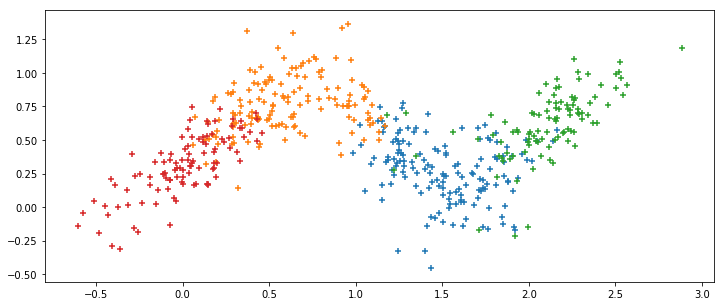

In [19]:
# plot generated data        
plt.figure(figsize=(12, 5))

xs = np.c_[dpm3.x, dpm3.s_hat]

for i in range(dpm3.c_hat+1):
    plt.scatter(xs[xs[:,2]==i][:,0], xs[xs[:,2]==i][:,1], marker="+")
plt.show()

In [20]:
dpm3.n_hat

{0: 150, 1: 146, 2: 101, 3: 103}